# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached tensorflow_gpu-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
  Using cached matplotlib-3.5.2-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached protobuf-3.19.4-cp39-cp39-win_amd64.whl (895 kB)
  Using cached h5py-3.7.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached wrapt-1.14.1-cp39-cp39-win_amd64.whl (35 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (

You should consider upgrading via the 'C:\Users\marwe\Python\imag\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.1.0
asttokens                    2.0.5
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.2.0
certifi                      2022.5.18.1
charset-normalizer           2.0.12
colorama                     0.4.4
cycler                       0.11.0
debugpy                      1.6.0
decorator                    5.1.1
entrypoints                  0.4
executing                    0.8.3
flatbuffers                  1.12
fonttools                    4.33.3
gast                         0.4.0
google-auth                  2.7.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.46.3
h5py                         3.7.0
idna                         3.3
importlib-metadata           4.11.4
ipykernel                    6.14.0
ipython                      8.4.0
jedi                         0.18.1
jupy

You should consider upgrading via the 'C:\Users\marwe\Python\imag\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors 
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus :
    tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Cleaning images for Data Pipeline

In [41]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [7]:
data_dir = 'data' 

In [12]:
#Image Format
image_exists = ['jpeg','jpg', 'bmp', 'png']

In [13]:
image_exsts

['jpeg', 'jpg', 'bmp', 'png']

In [14]:
os.listdir(data_dir)

['happy', 'sad']

In [39]:
#Check every single image for 5 first images
test=os.listdir(os.path.join(data_dir,'happy'))[:4]
test

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg']

In [37]:
img=cv2.imread(os.path.join('data','happy',test[0]))

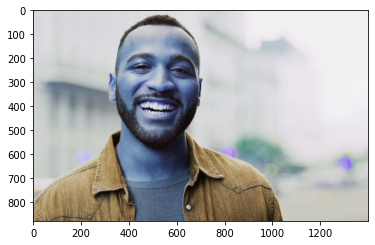

In [45]:
plt.imshow(img)
plt.show()
#OpenCV read a image as bgr and Matplotlib expects it be rgb :)

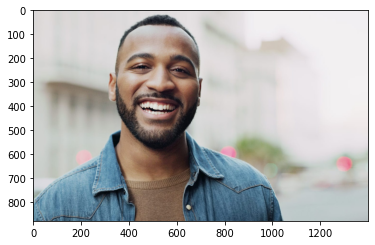

In [44]:
#fix 
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
#looping throw every folder
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            #Image extension
            tip = imghdr.what(image_path)
            if tip not in image_exists: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

# 3. Load Data

In [48]:
import numpy as np
from matplotlib import pyplot as plt

In [51]:
#Data set API -> tf.data.Dataset
#tf.keras.utils.image_dataset_from_directory?? #-> batch_size=32 , the number of samples that will be propagated through the network.

In [92]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [65]:
data_iterator = data.as_numpy_iterator()

In [56]:
data_iterator

In [66]:
#grab one batch
batch = data_iterator.next()

In [60]:
len(batch)
# one for Images and one for labels

2

In [61]:
# each batch have 32-Images
batch[0].shape

(32, 256, 256, 3)

In [70]:
batch[1]
# 0 for happy
# 1 for sad

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

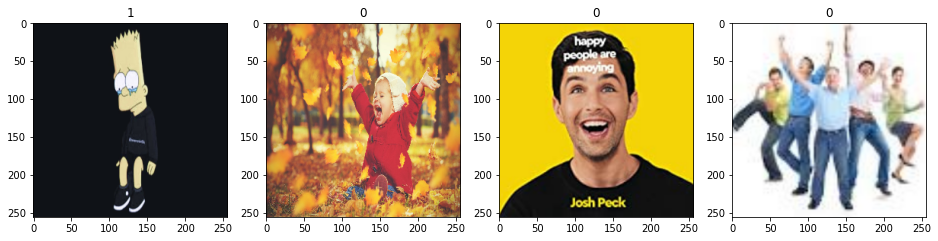

In [69]:
fig, ax =plt.subplots(ncols=4, figsize=(16,20))
for idx , img in enumerate(batch[0][:4]) :
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [94]:
scale_data =data.map(lambda x,y : (x/255 ,y))

In [95]:
scale_data.as_numpy_iterator().next()[0][0]

array([[[0.52156866, 0.58431375, 0.5411765 ],
        [0.53333336, 0.59607846, 0.5529412 ],
        [0.5529412 , 0.6156863 , 0.57254905],
        ...,
        [0.85882354, 0.8039216 , 0.7921569 ],
        [0.8627451 , 0.80784315, 0.79607844],
        [0.8666667 , 0.8117647 , 0.8       ]],

       [[0.52156866, 0.58431375, 0.5411765 ],
        [0.53333336, 0.59607846, 0.5529412 ],
        [0.5529412 , 0.6156863 , 0.57254905],
        ...,
        [0.85882354, 0.8039216 , 0.7921569 ],
        [0.86269146, 0.8077895 , 0.7960248 ],
        [0.8627451 , 0.80784315, 0.79607844]],

       [[0.52156866, 0.58431375, 0.5411765 ],
        [0.53333336, 0.59607846, 0.5529412 ],
        [0.5529412 , 0.6156863 , 0.57254905],
        ...,
        [0.85882354, 0.8039216 , 0.7921569 ],
        [0.85882354, 0.8039216 , 0.7921569 ],
        [0.8600414 , 0.8051394 , 0.7933747 ]],

       ...,

       [[0.95023745, 0.8835708 , 0.85219824],
        [0.94509804, 0.8784314 , 0.84705883],
        [0.9556449 , 0

In [96]:
scale_iter = scale_data.as_numpy_iterator()

In [97]:
batch = scale_iter.next()

In [142]:
batch

(array([[[[0.9882353 , 0.9060853 , 0.64588696],
          [0.99019605, 0.9043275 , 0.65510494],
          [0.9872204 , 0.89898515, 0.6440602 ],
          ...,
          [0.982261  , 0.90973496, 0.6616154 ],
          [0.9841108 , 0.91426545, 0.6811351 ],
          [0.9829389 , 0.8866575 , 0.6448951 ]],
 
         [[0.9876494 , 0.89587545, 0.6331304 ],
          [0.98979014, 0.9022978 , 0.6400276 ],
          [0.99213386, 0.91174173, 0.66662073],
          ...,
          [0.98232996, 0.9018918 , 0.6568398 ],
          [0.9837048 , 0.9106809 , 0.6749809 ],
          [0.9790173 , 0.8962814 , 0.64863664]],
 
         [[0.98489964, 0.899797  , 0.6501685 ],
          [0.9862745 , 0.9043275 , 0.65476793],
          [0.9901501 , 0.9029527 , 0.64509803],
          ...,
          [0.9832759 , 0.89702433, 0.63714004],
          [0.9893842 , 0.91014093, 0.6655829 ],
          [0.9860715 , 0.90685123, 0.65686274]],
 
         ...,
 
         [[0.82607615, 0.8415594 , 0.8421454 ],
          [0.92772

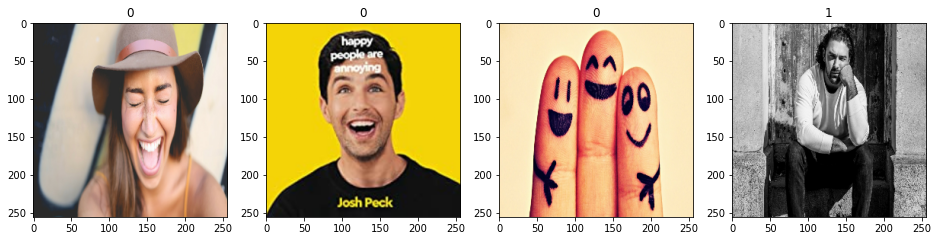

In [98]:
fig, ax =plt.subplots(ncols=4, figsize=(16,20))
for idx , img in enumerate(batch[0][:4]) :
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [100]:
data_len=len(scale_data)
data_len
#10 batchs -> 10*32 images

10

In [101]:
#train take 7 Batchs
#val take 2
#test take 1
train_size = int(len(scale_data)*.7)
val_size = int(len(scale_data)*.2)
test_size = int(len(scale_data)*.1)

In [102]:
val_size

2

In [103]:
#https://www.tensorflow.org/api_docs/python/tf/data/Dataset#skip
train = scale_data.take(train_size)
val =  scale_data.skip(train_size).take(val_size)
test = scale_data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [117]:
#https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/

In [105]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [104]:
#for one Data input and one Data outbut the model  API "Sequatial" is likely 
from tensorflow.keras.models import Sequential
#https://ai.stackexchange.com/questions/16443/wouldnt-convolutional-neural-network-models-work-better-without-flattening-the
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [106]:
model = Sequential()

In [107]:
#https://stackoverflow.com/questions/55798841/the-first-layer-in-a-sequential-model-must-get-an-inputshape-or-batchinputsh

#Input_layer -> 16 filters and is going to be three pixels by three pixels , and it's goining to move one pixel each time
# use "relu" insted "sigmoid" to converting any negative values to zero and positive remain -unchanged-
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
#MaxPooling just take the maximum value after the relu activation


model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#https://www.superdatascience.com/blogs/convolutional-neural-networks-cnn-step-3-flattening
model.add(Flatten())

model.add(Dense(256, activation='relu'))

#single output
#use sigmoid ,because sigmoid with any input convert that in range (0,1) for happy and sad 
model.add(Dense(1, activation='sigmoid'))

In [108]:
#ther's a ton of optimizers that are actually available( tf.optimizers.)
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [110]:
#the path of the directory where to save the log files to be parsed by TensorBoard.
logdir='logs'

In [111]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [112]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 16s 761ms/step - loss: 1.5807 - accuracy: 0.4286 - val_loss: 0.6794 - val_accuracy: 0.4844
Epoch 2/20
7/7 [==============================] - 7s 674ms/step - loss: 0.6743 - accuracy: 0.5804 - val_loss: 0.6687 - val_accuracy: 0.6875
Epoch 3/20
7/7 [==============================] - 9s 953ms/step - loss: 0.6360 - accuracy: 0.6920 - val_loss: 0.5585 - val_accuracy: 0.6094
Epoch 4/20
7/7 [==============================] - 8s 700ms/step - loss: 0.6252 - accuracy: 0.6161 - val_loss: 0.5265 - val_accuracy: 0.9375
Epoch 5/20
7/7 [==============================] - 7s 702ms/step - loss: 0.5344 - accuracy: 0.8348 - val_loss: 0.4264 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 7s 705ms/step - loss: 0.4473 - accuracy: 0.8170 - val_loss: 0.2984 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 8s 733ms/step - loss: 0.3839 - accuracy: 0.8259 - val_loss: 0.3652 - val_accuracy: 0.8594
Epoch 8/20
7/7 [===

# 8. Plot Performance

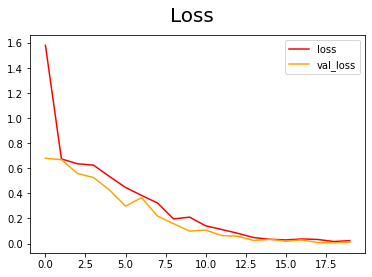

In [114]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()
#if validation_loss sort of rising up -> Indication for Overfitting

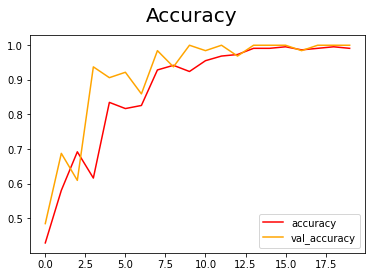

In [116]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# 9. Evaluate

In [118]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [119]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [122]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    predict = model.predict(X)
    pre.update_state(y, predict)
    re.update_state(y, predict)
    acc.update_state(y, predict)

1/1 [==============================] - 0s 51ms/step


In [123]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [148]:
import cv2

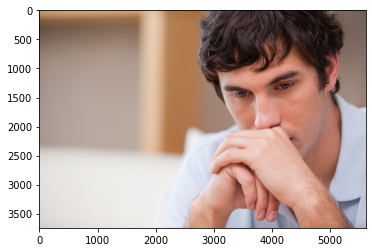

In [149]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

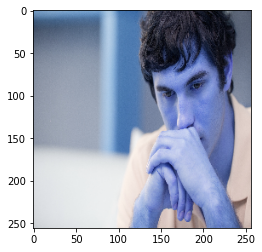

In [150]:
# When we pass through data to NN , need to shape that to (255,255)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [151]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[115.01953 , 150.63867 , 190.63867 ],
        [117.32422 , 153.88672 , 193.69922 ],
        [118.16211 , 153.84375 , 193.28516 ],
        ...,
        [ 85.94336 ,  95.59961 , 114.28711 ],
        [ 79.359375,  90.546875, 108.546875],
        [ 82.35547 ,  92.35547 , 110.35547 ]],

       [[108.06445 , 147.06445 , 186.06445 ],
        [112.853516, 151.85352 , 190.85352 ],
        [116.58594 , 153.03711 , 192.88672 ],
        ...,
        [ 83.58789 ,  93.58789 , 111.58789 ],
        [ 85.48047 ,  92.6543  , 111.42578 ],
        [ 83.68359 ,  90.41992 , 109.41992 ]],

       [[106.62695 , 145.62695 , 184.62695 ],
        [110.54297 , 149.54297 , 188.54297 ],
        [109.30859 , 145.3086  , 185.3086  ],
        ...,
        [ 86.21875 ,  96.21875 , 114.21875 ],
        [ 84.1543  ,  94.1543  , 112.1543  ],
        [ 83.703125,  93.703125, 111.703125]],

       ...,

       [[199.52734 , 203.52734 , 208.52734 ],
        [203.

In [152]:
#NN expects to pass through a batch of images not a single image,
# we need to encapsulate it inside of other set array or list
np.expand_dims(resize, 0)

array([[[[115.01953 , 150.63867 , 190.63867 ],
         [117.32422 , 153.88672 , 193.69922 ],
         [118.16211 , 153.84375 , 193.28516 ],
         ...,
         [ 85.94336 ,  95.59961 , 114.28711 ],
         [ 79.359375,  90.546875, 108.546875],
         [ 82.35547 ,  92.35547 , 110.35547 ]],

        [[108.06445 , 147.06445 , 186.06445 ],
         [112.853516, 151.85352 , 190.85352 ],
         [116.58594 , 153.03711 , 192.88672 ],
         ...,
         [ 83.58789 ,  93.58789 , 111.58789 ],
         [ 85.48047 ,  92.6543  , 111.42578 ],
         [ 83.68359 ,  90.41992 , 109.41992 ]],

        [[106.62695 , 145.62695 , 184.62695 ],
         [110.54297 , 149.54297 , 188.54297 ],
         [109.30859 , 145.3086  , 185.3086  ],
         ...,
         [ 86.21875 ,  96.21875 , 114.21875 ],
         [ 84.1543  ,  94.1543  , 112.1543  ],
         [ 83.703125,  93.703125, 111.703125]],

        ...,

        [[199.52734 , 203.52734 , 208.52734 ],
         [203.01758 , 208.01758 , 211.01758 ]

In [153]:
predict = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 45ms/step


In [145]:
predict

array([[0.0524783]], dtype=float32)

In [154]:
if predict > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
